## Sprint5 機械学習スクラッチSVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## 【問題1】SVM分類器のクラスを作成する

## ラグランジュの未定乗数法による最急降下

In [ ]:
# def kernel_(X):
#     return np.dot(X , X.T)

In [ ]:
# lamda = np.random.rand(X.shape[0])
# lr = 0.0001

In [ ]:
# def _gradient_descent(X , y , lamda , lr):
#     sum_xy = np.dot(y , y.T) * kernel_(X)
#     rag = np.sum(np.dot(lamda , sum_xy.T))
#     lamda = lamda + lr * (1 - rag)
#     return lamda

In [ ]:
# s = _gradient_descent(X , y , lamda , lr)

In [ ]:
# def predict(X , y):
#     s = _gradient_descent(X , y , lamda , lr)
#     y = y.reshape(-1 , 1)
#     s = s.reshape(-1 , 1)
#     xys = np.concatenate([s , X , y] , axis = 1)
#     xys = pd.DataFrame(data = xys)
#     a = pd.DataFrame(data = xys[xys[0] > 0.001])

#     xn = a.iloc[: , 1:int(X.shape[1] + 1)].values
#     yn = a.iloc[: , -1].values.reshape(1,-1)
#     lamda_n = a.iloc[: , 0].values.reshape(1,-1)
    
#     print(xn.shape)
#     print(yn.shape)
#     print(lamda_n.shape)
#     sum_x = np.dot(X , xn.T)
#     add_xy = sum_x * yn
#     print(add_xy.shape)
#     y_pred = np.sum(lamda_n * add_xy.T , axis = 1)
#     return y_pred

In [ ]:
# predict(X , y)

In [ ]:
# ad = []
# for i , d in enumerate(s):
#     if d > 0.1:
#         ad.append(i)
# print(ad)
# X[ad].shape

In [ ]:
# np.where(y >= 0.0001, True , False).shape

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
y.columns = ["Species"]
df = pd.concat([X , y] , axis = 1)

In [ ]:
df_cn = df.query("Species == [1,2]").loc[: , :]
X_iris = df_cn.iloc[: , :4].values
y_iris = df_cn.iloc[: , -1].values
y_iris[y_iris==2] = -1

In [ ]:
class ScratchSVMClassifier():
    """
    SVMのスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter=100, lr=0.00001, verbose=True,C=10**10 , kernel='rbf' , la = 0.0001):
        # ハイパーパラメータを属性として記録
        self.lamda = None
        self.ka = None
        
        self.iter = num_iter
        self.lr = lr
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.C = C
        self.kernel = kernel #線形カーネル
        self.la = la
        self.y = y
        
        
    def kernel_(self , X ):
        return np.dot(X , X.T)
    
#     def kernel_2(self , X , Xn , k = 1):
#         return k * np.dot(X , self.Xn.T)
    
    def _gradient_descent(self , X , y):
        sum_xy = self.ka_y * self.ka_X
        rag = np.sum(np.dot(self.lamda , sum_xy.T))
        self.lamda = self.lamda + self.lr *(1 - rag)
        return self.lamda

    def fit(self, X, y, X_val=None, y_val=None):
        """
         SVMを学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """
        np.random.seed(0)
        self.lamda = np.random.rand(X.shape[0])*0.01
        
        for i in range(self.iter):
            self.ka_X = self.kernel_(X )
            self.ka_y = self.kernel_(y)
            self.lam = self._gradient_descent(X , y)
            
        index_ = []
        for i , d in enumerate(self.lamda):
            if d > self.la:
                index_.append(i)
        self.lamda[self.lamda < 0] = 0
        self.Xn = X[index_]
        self.yn = y[index_].reshape(1,-1)
        self.lamda = self.lamda[index_].reshape(-1,1)
#         sum_xyn = self.yn * (np.dot(X , self.Xn.T))
#         self.y_pred = np.sum((self.lamda_n * sum_xyn.T) , axis = 1)

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.lamda.shape)


    def predict(self, X):
        """
        SVMを使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVMによる推定結果
        """
        sum_xn =np.dot(X , self.Xn.T)
        sum_xyn =  self.yn * sum_xn
        self.y_pred = np.sum((self.lamda * sum_xyn.T) , axis = 0)
        for i in range(self.y_pred.shape[0]):
            if self.y_pred[i] < 0:
                self.y_pred[i] = -1
            else:
                self.y_pred[i] =  1
#         np.where(self.y_pred < 0 , -1,1)
#         sum_xyn = self.yn * (np.dot(X , self.Xn.T))
#         y_pred = np.sum(np.dot(self.lamda_n , sum_xyn.T))
        return self.y_pred

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
               X_iris , y_iris , test_size = 0.25)

In [ ]:
svm = ScratchSVMClassifier()
svm.fit(X_train , y_train)

In [ ]:
svm.predict(X_test)

In [ ]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train , y_train)
sv.predict(X_test)

## 【問題3】指標値の算出

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , recall_score, f1_score ,  confusion_matrix

In [ ]:
def learn_model(X , y , model = svm):
    X_train , X_test , y_train , y_test = train_test_split(
                  X , y , test_size = 0.25)
    model.fit(X_train , y_train)
    y_pred = model.predict(X_test)  
    score = accuracy_score(y_test , y_pred)
    pre_score = precision_score(y_test , y_pred)
    re_score = recall_score(y_test , y_pred)
    f_score = f1_score(y_test , y_pred)
    con_mat = confusion_matrix(y_test , y_pred)
    
    print("accuracy_score :" , score)
    print("precision_score :" , pre_score)
    print("recall_score :" , re_score)
    print("f1_score :" , f_score)
    print("confusion_matrix :" , con_mat)

## irisデータ

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = ["sepal_length" , "sepal_width" , "petal_length" , "petal_width"]
y.columns = ["Species"]
df = pd.concat([X , y] , axis = 1)

In [ ]:
df_cn = df.query("Species == [1,2]").loc[: , :]
X_iris = df_cn.iloc[: , :4].values
y_iris = df_cn.iloc[: , -1].values
y_iris[y_iris==0] = -1

In [ ]:
learn_model(X_iris , y_iris)

## データ２

In [ ]:
import numpy as np

np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X_2 = X[random_index]
y_2 = y[random_index]

In [ ]:
learn_model(X_2 , y_2)

## データ３

In [ ]:
X_3 = np.array([[-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
       [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
       [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
       [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
       [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
       [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
       [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
       [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
       [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
       [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
       [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
       [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
       [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
       [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
       [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
       [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
       [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
       [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
       [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
       [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ]])
y_3 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
y_3[y_3==0]=-1

In [ ]:
learn_model(X_3 , y_3)

## 【問題4】決定領域の可視化

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    marker = ["o" , "^"]

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker=marker[i])
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.scatter(svm.Xn[: , 0], svm.Xn[:,1] , color = "white")
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

## irisデータ

In [67]:
X_train , X_test , y_train , y_test = train_test_split(
                  X_iris , y_iris , test_size = 0.25)
svm = ScratchSVMClassifier(lr = 1e-11, num_iter = 150000 , la = 0.005)
svm.fit(X_train[:,1:3] , y_train)

(0, 1)


/Users/hayashikentaro/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


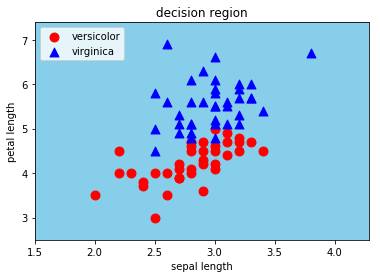

In [68]:
decision_region(X_train[:,1:3] , y_train , svm ,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length', target_names=['versicolor', 'virginica'] )

## データ２

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(
                  X_2 , y_2 , test_size = 0.25)

In [ ]:
svm = ScratchSVMClassifier(lr = 1e-11, num_iter = 150000 , la = 0.005)
svm.fit(X_train , y_train)

In [ ]:
decision_region(X_train , y_train , svm ,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length') #, target_names=['versicolor', 'virginica'] 

## データ３

In [65]:
X_train , X_test , y_train , y_test = train_test_split(
                  X_3 , y_3 , test_size = 0.25)
svm = ScratchSVMClassifier(lr = 1e-11, num_iter = 150000 , la = 0.005)
svm.fit(X_train , y_train)

(14, 1)


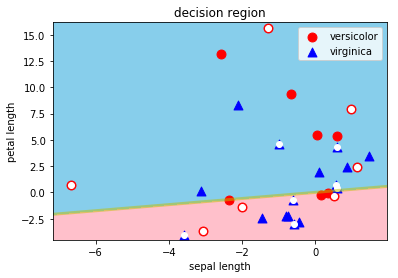

In [66]:
decision_region(X_train , y_train , svm ,  title='decision region', xlabel='sepal length', 
                             ylabel='petal length') #, target_names=['versicolor', 'virginica'] 

## 【問題5】時間の計測

In [ ]:
import time
t0 = time.time()
svm.fit(X_train , y_train)
t1 = time.time()
print('time : {}s'.format(t1-t0))

## 【問題6】ロジスティック回帰とSVM

**ロジスティック回帰**
2択の予測において、ロジスティック曲線を使用して片方になる確率を0から1の値で算出する。

**SVM**
・データを分類するための境界線を決定する際に、境界線から一番近いサンプルデータまでのマージンの和が最大になる線を境界線とする手法。分類も回帰にも利用できる。

・SVMは決定境界の両側に幅をもたせていることで、未知のデータに遭遇した時に誤分類を防ぐことができる

・処理が複雑なので時間がかかる印象